In [2]:
setwd("~/Documents/DE/Shed/")
require(ggplot2)
require(nlme)
require(tidyr)
require(glmm)
require(dplyr)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: nlme
Loading required package: tidyr
Loading required package: glmm
Loading required package: trust
Loading required package: mvtnorm
Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack

Loading required package: parallel
Loading required package: doParallel
Loading required package: foreach
Loading required package: iterators
Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:nlme’:

    collapse

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
filtration=read.csv("Filtration.csv")
oysters=read.csv("Oyster_data.csv")

In [6]:
filtration$change=filtration$Time0-filtration$Time6

In [9]:
infected=oysters[!is.na(oysters$TISSUE),]

In [10]:
head(infected)

,ID,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived
1,26Y,HIGH,4,,NA,NA,NA,NA,Yes,Yes
3,28Y,HIGH,2,,NA,NA,NA,NA,No,Yes
5,30Y,HIGH,3,,NA,NA,NA,NA,Yes,Yes
6,32Y,HIGH,5,,NA,NA,NA,NA,Yes,Yes
7,33Y,HIGH,2,,NA,NA,NA,NA,Yes,Yes
8,34Y,HIGH,4,7-Nov,7-Nov,8-Nov,28,29,No,No


In [11]:
infected_filt=filtration[filtration$ID %in% infected$ID,]

In [12]:
infected_filt$change=infected_filt$Time0-infected_filt$Time6

In [13]:
infected_filt=pivot_longer(infected_filt,  cols = starts_with("Time"), names_to = "Time")

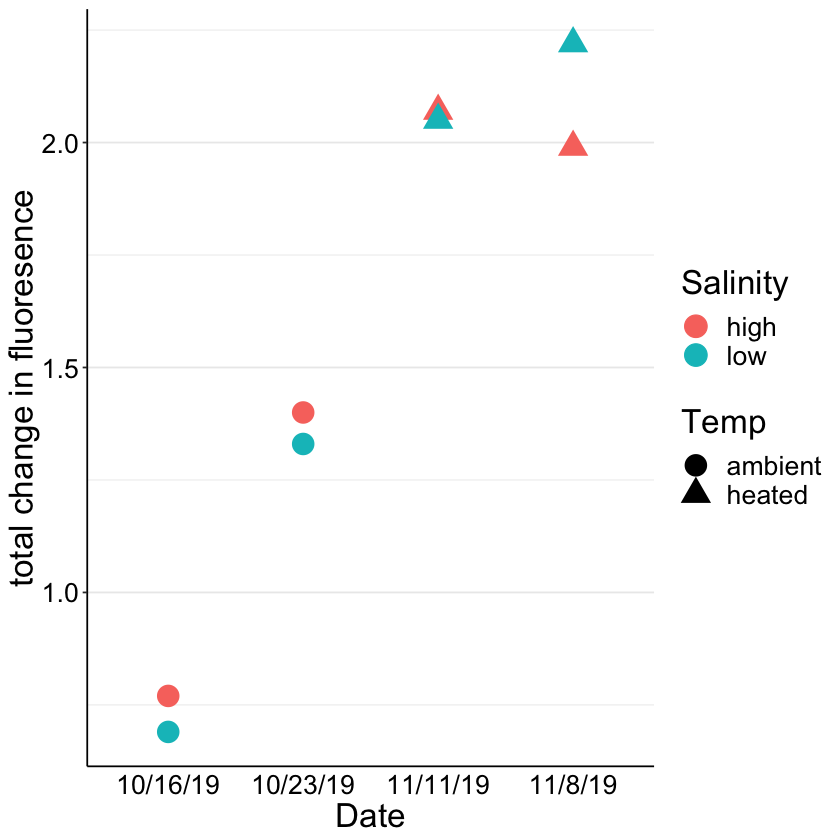

In [14]:
ggplot(na.omit(filtration[filtration$ID=="CONTROL",]), aes(x = Date, y = change, shape=Temp, col=Salinity, group=ID)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
#geom_line()+
#facet_grid(. ~ Salinity)+

theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("total change in fluoresence")

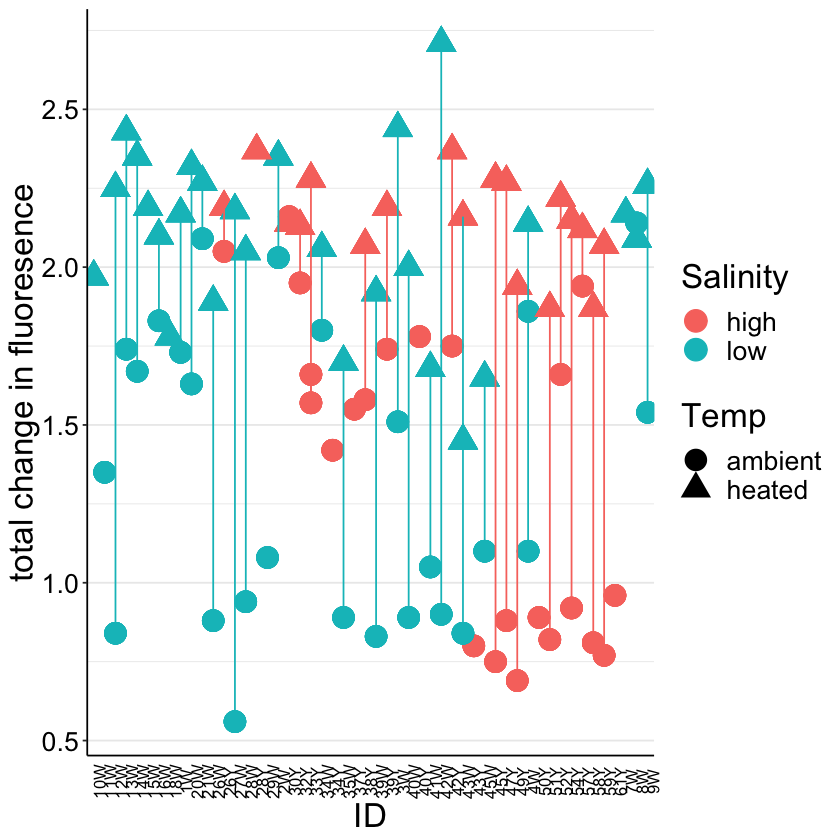

In [15]:
ggplot(na.omit(infected_filt), aes(x = ID, y = change, shape=Temp, col=Salinity, group=ID)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+

theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text=element_text(size=20),
       axis.text.x = element_text(size=10, angle=90))+
ylab("total change in fluoresence")

In [18]:
head(infected_filt)

Date,Jar,Salinity,Temp,Oyster,ID,change,Time,value
10/16/19,1,low,ambient,W4,4W,1.1,Time0,1.34
10/16/19,1,low,ambient,W4,4W,1.1,Time1,0.58
10/16/19,1,low,ambient,W4,4W,1.1,Time2,0.48
10/16/19,1,low,ambient,W4,4W,1.1,Time3,0.40
10/16/19,1,low,ambient,W4,4W,1.1,Time4,0.34
10/16/19,1,low,ambient,W4,4W,1.1,Time5,0.30


In [19]:
head(oysters)

ID,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived
26Y,HIGH,4,,NA,NA,NA,NA,Yes,Yes
27Y,HIGH,NA,20-Oct,NA,21-Oct,NA,11,No,No
28Y,HIGH,2,,NA,NA,NA,NA,No,Yes
29Y,HIGH,NA,11-Nov,NA,12-Nov,NA,NA,No,No
30Y,HIGH,3,,NA,NA,NA,NA,Yes,Yes
32Y,HIGH,5,,NA,NA,NA,NA,Yes,Yes


In [22]:
infected_filt_all=merge(infected_filt, oysters, by="ID")

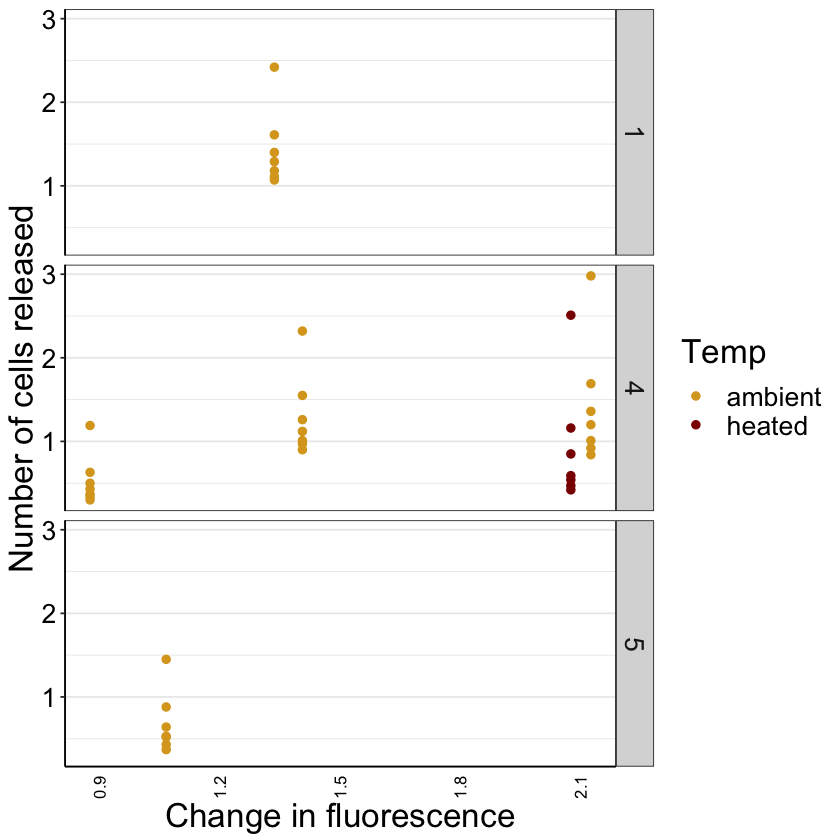

In [25]:
ggplot(na.omit(infected_filt_all), aes(x = change, y = value, col=Temp)) +
scale_color_manual(values=c( "goldenrod", "darkred"))+
        geom_point(size=2)+
#geom_line()+
facet_grid( TISSUE~.)+

theme_bw()+
 theme(legend.position="right", 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text=element_text(size=20),
       axis.text.x = element_text(size=10, angle=90))+
ylab("Number of cells released")+
xlab("Change in fluorescence")

From Gedan 2014: Five individual mussels or oysters were introducedinto each mesocosm (n=5 per species) prior to the feeding trialfor 16 hours of pre-trial starvation and temperature acclimation.
Two mesocosms were left empty as ungrazed controls. 
Atthe start of the experiments, mesocosms were inoculated with0.6 mL of DT’s (N. oculata[157.5×106cells/mL] andP. tri-cornutum[41.24×106cells/mL]) and 10 mL ofT. chuyiculture[1.36×106cells/mL]. These are live cultures
Seawater samples (10 mL) were drawnupon inoculation and after an hour of feeding and analyzedon a Multisizer 4 Coulter particle counter (Beckman-CoulterInc., Indianapolis, IN, U.S.A.). 

People do measure chlorophyll with fluorescence:  L.  E.  Brand,    R.  R.  L.  Guillard, and   L.  S.  Murphy:    A  method   for  the  rapid   and   precise   determination     of  acclimated    phytoplankton  reproduction     rates.   J.  Plank.    Res.,   3,  193-201   (1980)
But this is with live algae again. Also they use certain color filters specific to chlorophyll. 
Did we not add enough to see a difference between treatments and controls? since chlorophyll degraded. 
Standard curve?
Fluorometer not sensitive enough?

Can also use Fluorescein or Rhodamine which are more stable, but seems more relevant for movement of water around oysters than actual clearance rate, since that depends on particles. 
Jonsson2005

